### FEATURE EXTRCTION WITH EIGEN FACE

In [2]:
%config Completer.use_jedi = True

In [10]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (842801469.py, line 1)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# eigen face
from sklearn.decomposition  import PCA
import pickle

In [13]:
# Load the data
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb'))

In [14]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,female
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,female
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,female


### Eigen Face

In [15]:
# Mean face
X = data.drop('gender',axis=1).values # all images

In [16]:
X

array([[0.7372549 , 0.71372549, 0.71372549, ..., 0.46666667, 0.45882353,
        0.43137255],
       [0.1254902 , 0.09019608, 0.12156863, ..., 0.14509804, 0.24705882,
        0.07058824],
       [0.19215686, 0.19215686, 0.1372549 , ..., 0.83137255, 0.82352941,
        0.81568627],
       ...,
       [0.96470588, 0.95686275, 0.95686275, ..., 0.37647059, 0.32156863,
        0.29803922],
       [0.10196078, 0.09411765, 0.08627451, ..., 0.19215686, 0.19215686,
        0.2       ],
       [0.83137255, 0.83529412, 0.83529412, ..., 0.28627451, 0.31764706,
        0.33333333]], shape=(4942, 10000))

In [19]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(10000,)

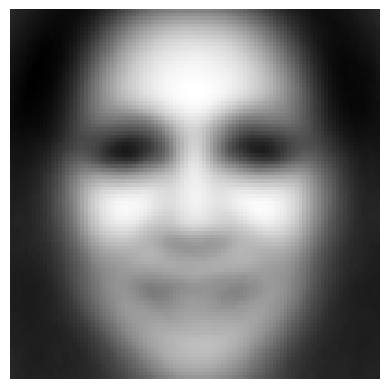

In [23]:
# visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

In [24]:
X_t = X-mean_face # transform data

### Apply X_t to PCA
- find the right number of component - elbow
- with right number component computer principal components

In [26]:
pca = PCA(n_components=None, whiten = True, svd_solver = 'auto')
pca.fit(X_t)

PCA(whiten=True)